# Visualizing coral records

This notebook showcases some common visualization for coral $\delta^{18}$O records. As an example, we use the record from [Tangri et al. (2018)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2017PA003310). The data is avalable through NOAA's National Centers for Environmental Information. 

For the visualization, we will be using the [Pyleoclim software](https://pyleoclim-util.readthedocs.io/en/latest/) package. 

Let's import needed packages. 

In [40]:
# To query the NOAA API
import json
import requests

# To manipulate the NOAA data
import pandas as pd

# To Visualize the data
import pyleoclim as pyleo

# set the visualization style
pyleo.set_style('journal')

## Data

The data presented here is the $\delta^{18}$O data from the Tau-1 core from American Samoa, linearly interpolated to monthly basis. The data covers the period 1520-2011 CE.

Information about how to access the data from the NOAA API is available [here](https://www.ncei.noaa.gov/access/paleo-search/api), NOAA Study ID 25270. 

In [12]:
api_url = "https://www.ncei.noaa.gov/access/paleo-search/study/search.json?NOAAStudyId=25270"
info = requests.get(api_url)
data_json = json.loads(info.text)     

Let's extract some basic metadata information:

In [36]:
lat = float(data_json['study'][0]['site'][0]['geo']['geometry']['coordinates'][0])
lon = float(data_json['study'][0]['site'][0]['geo']['geometry']['coordinates'][1])
print(lat)
print(lon)

-14.27
-169.5


You should get a latitude of -14.27 and a longitude of -169.5. 

Now let's get the file URL:

In [33]:
data_url = data_json['study'][0]['site'][0]['paleoData'][0]['dataFile'][0]['fileUrl']
data_url

'https://www.ncei.noaa.gov/pub/data/paleo/coral/central_pacific/tangri2018/tangri2018.txt'

You should get a link to a file named `tangri2018.txt`.

Let's open the data:

In [35]:
df = pd.read_csv(data_url, comment = '#', delimiter='\t')
df.head()

,date,d18O_porite
0,2011.875,-4.960000
1,2011.792,-5.199176
2,2011.708,-5.204065
3,2011.625,-5.224374
4,2011.542,-5.207290


## Visualization

In this notebook, we will do two simple visualizations: a simple timeseries plot and a dashboard.

The first step is to create a [`Geoseries` object](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#geoseries-pyleoclim-geoseries):

In [37]:
geo = pyleo.GeoSeries(time = df['date'], value = df['d18O_porite'], lat = lat, lon = lon,
                      time_name = 'Year', time_unit = 'CE', value_name = r'$\delta^{18} \mathrm{O}$', value_unit = '‰',
                      label = "Ta'u", archiveType = 'Coral', verbose = False)

### Timeseries visualization

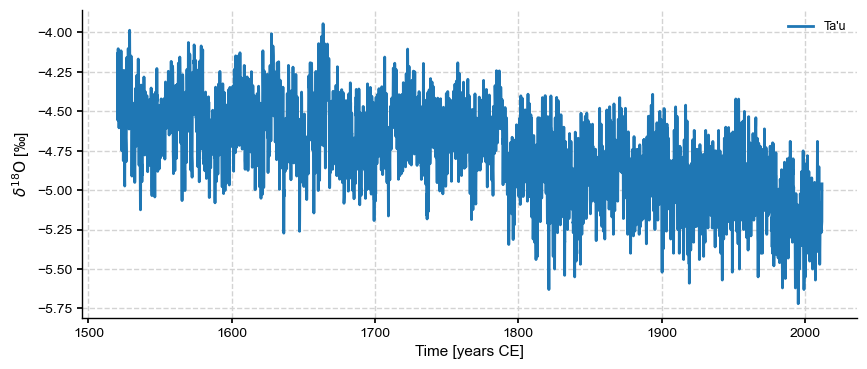

In [41]:
fig, ax  = geo.plot()

### Dashboard

Performing spectral analysis on individual series: 100%|█| 200/200 [00:41<00:00,


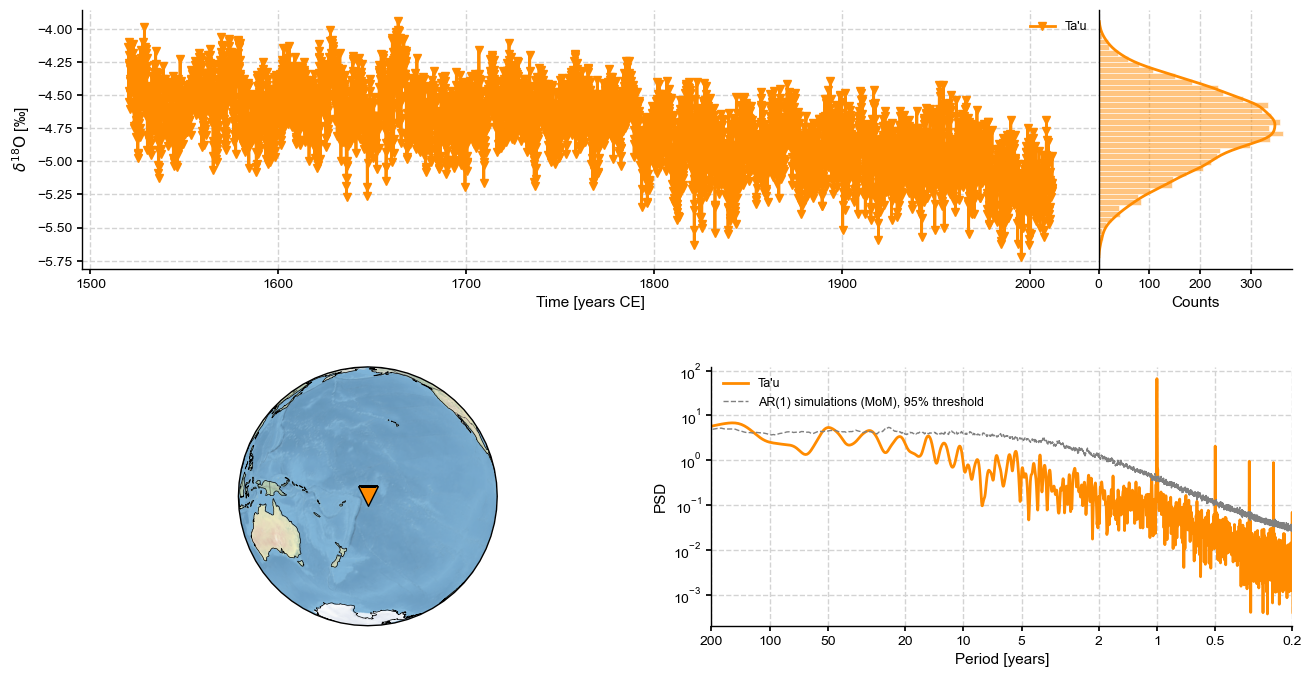

In [42]:
fig, ax = geo.dashboard() 

The record shows a strong annual cycle.

## References

Khider, D., Emile-Geay, J., Zhu, F., James, A., Landers, J., Kwan, M., Athreya, P., McGibbon, R., & Voirol, L. (2025). Pyleoclim: A Python package for the analysis and visualization of paleoclimate data (Version v1.2.0) [Computer software].[https://doi.org/10.5281/zenodo.1205661](https://doi.org/10.5281/zenodo.1205661)

Khider, D., Emile-Geay, J., Zhu, F., James, A., Landers, J., Ratnakar, V., & Gil, Y. (2022). Pyleoclim: Paleoclimate timeseries analysis and visualization with Python. Paleoceanography and Paleoclimatology, 37, e2022PA004509. [https://doi.org/10.1029/2022PA004509](https://doi.org/10.1029/2022PA004509)

Tangri, N., Dunbar, R.B., Linsley, B.K. and Mucciarone, D.M. (2018), ENSO's Shrinking Twentieth-Century Footprint Revealed in a Half-Millennium Coral Core From the South Pacific Convergence Zone. Paleoceanography and Paleoclimatology, 33: 1136-1150. [https://doi.org/10.1029/2017PA003310](https://doi.org/10.1029/2017PA003310)